#Problem Statement

#Importing necessary libraries

In [52]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib
import pickle
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder

#Loading the 2 datasets

In [3]:
nifty_data = pd.read_csv('/content/nifty.csv')
nifty_data.head()

,datetime,open,high,low,close,volume,open interest
0,2024-12-10 00:00:00,24652.65,24677.80,24510.65,24610.05,0,0
1,2024-12-09 00:00:00,24633.90,24705.00,24580.05,24619.00,0,0
2,2024-12-06 00:00:00,24729.45,24751.05,24620.50,24677.80,0,0
3,2024-12-05 00:00:00,24539.15,24857.75,24295.55,24708.40,0,0
4,2024-12-04 00:00:00,24488.75,24573.20,24366.30,24467.45,0,0


In [4]:
news_data = pd.read_csv('/content/finalfinancedata.csv')
news_data.head()

,title,link,snippet,date_range,date
0,"Financial Express Mumbai, Thu, 12 Dec 24",https://epaper.financialexpress.com/t/26733/la...,... Financial Express comes packed with incisi...,01/01/2019 to 01/31/2019,NaN
1,Reserve-bank-of-india News - Mint,https://www.livemint.com/topic/reserve-bank-of...,Reserve-bank-of-india News: Get the latest Res...,01/01/2019 to 01/31/2019,NaN
2,Budget years of Arun Jaitley Finance Minister,https://m.economictimes.com/budget/jaitleys-bu...,Arun Jaitley's five-year struggle to bring dow...,01/01/2019 to 01/31/2019,NaN
3,Indian lender DMI Finance raises $230m from Eu...,https://www.dmifinance.in/indian-lender-dmi-fi...,Non-banking financial company DMI Finance Pvt....,01/01/2019 to 01/31/2019,NaN
4,Khushboo Narayan,https://www.financialexpress.com/author/khushb...,"In an 18-page complaint, these investors have ...",01/01/2019 to 01/31/2019,NaN


In [5]:
news_data.head()

,title,link,snippet,date_range,date
0,"Financial Express Mumbai, Thu, 12 Dec 24",https://epaper.financialexpress.com/t/26733/la...,... Financial Express comes packed with incisi...,01/01/2019 to 01/31/2019,NaN
1,Reserve-bank-of-india News - Mint,https://www.livemint.com/topic/reserve-bank-of...,Reserve-bank-of-india News: Get the latest Res...,01/01/2019 to 01/31/2019,NaN
2,Budget years of Arun Jaitley Finance Minister,https://m.economictimes.com/budget/jaitleys-bu...,Arun Jaitley's five-year struggle to bring dow...,01/01/2019 to 01/31/2019,NaN
3,Indian lender DMI Finance raises $230m from Eu...,https://www.dmifinance.in/indian-lender-dmi-fi...,Non-banking financial company DMI Finance Pvt....,01/01/2019 to 01/31/2019,NaN
4,Khushboo Narayan,https://www.financialexpress.com/author/khushb...,"In an 18-page complaint, these investors have ...",01/01/2019 to 01/31/2019,NaN


#Data Cleaning

##Nifty data

In [6]:
nifty_data['datetime'] = pd.to_datetime(nifty_data['datetime'])
nifty_data = nifty_data.sort_values(by='datetime').drop_duplicates(subset='datetime').reset_index(drop=True)
nifty_data = nifty_data[(nifty_data['datetime'] >= '2019-01-01') & (nifty_data['datetime'] <= '2024-12-31')]
nifty_data['date'] = nifty_data['datetime'].dt.date

<ipython-input-6-863716eed5b7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty_data['date'] = nifty_data['datetime'].dt.date


In [7]:
nifty_data.head()

,datetime,open,high,low,close,volume,open interest,date
6891,2019-01-01,10881.70,10923.60,10807.10,10910.10,0,0,2019-01-01
6892,2019-01-02,10868.85,10895.35,10735.05,10792.50,0,0,2019-01-02
6893,2019-01-03,10796.80,10814.05,10661.25,10672.25,0,0,2019-01-03
6894,2019-01-04,10699.70,10741.05,10628.65,10727.35,0,0,2019-01-04
6895,2019-01-07,10804.85,10835.95,10750.15,10771.80,0,0,2019-01-07


## News data

##Extract date from datr range as it is missing

In [8]:
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce')

##Extract date from date range if it has NaN

In [9]:
news_data.loc[news_data['date'].isna(), 'date'] = news_data['date_range'].str.split(' to ').str[0]

##Verifying any fill remanining NaN values using backfill

In [10]:
news_data['date'] = news_data['date'].fillna(method='bfill').fillna(method='ffill')




<ipython-input-10-809006281ec9>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  news_data['date'] = news_data['date'].fillna(method='bfill').fillna(method='ffill')


In [11]:
news_data.head()

,title,link,snippet,date_range,date
0,"Financial Express Mumbai, Thu, 12 Dec 24",https://epaper.financialexpress.com/t/26733/la...,... Financial Express comes packed with incisi...,01/01/2019 to 01/31/2019,2019-01-01
1,Reserve-bank-of-india News - Mint,https://www.livemint.com/topic/reserve-bank-of...,Reserve-bank-of-india News: Get the latest Res...,01/01/2019 to 01/31/2019,2019-01-01
2,Budget years of Arun Jaitley Finance Minister,https://m.economictimes.com/budget/jaitleys-bu...,Arun Jaitley's five-year struggle to bring dow...,01/01/2019 to 01/31/2019,2019-01-01
3,Indian lender DMI Finance raises $230m from Eu...,https://www.dmifinance.in/indian-lender-dmi-fi...,Non-banking financial company DMI Finance Pvt....,01/01/2019 to 01/31/2019,2019-01-01
4,Khushboo Narayan,https://www.financialexpress.com/author/khushb...,"In an 18-page complaint, these investors have ...",01/01/2019 to 01/31/2019,2019-01-01


### Handle missing values in 'usable_date'

In [12]:
news_data['usable_date'] = news_data['date']


##Extract start date from date range if usable data aint available

In [13]:
news_data['usable_date'] = news_data['usable_date'].fillna(news_data['date_range'].str.split(' to ').str[0])

##Convert usable date to datetime

In [14]:
news_data['usable_date'] = pd.to_datetime(news_data['usable_date'], errors='coerce')

## Fill remaningi values with backfill/forward fill

In [15]:
news_data['usable_date'] = news_data['usable_date'].fillna(method='bfill').fillna(method='ffill')

<ipython-input-15-5eb7ac7d4a5a>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  news_data['usable_date'] = news_data['usable_date'].fillna(method='bfill').fillna(method='ffill')


##Verify and drop rows when usable date is nan

In [16]:
news_data = news_data.dropna(subset=['usable_date']).reset_index(drop=True)

##Ensure date in nifty data into datetime.date

In [17]:
nifty_data['date'] = pd.to_datetime(nifty_data['date']).dt.date



##Ensure  usable date in news data into datetime.date

In [18]:
news_data['usable_date'] = pd.to_datetime(news_data['usable_date'], errors='coerce').dt.date

In [19]:
if 'snippet' in news_data.columns:
    news_data['snippet'] = news_data['snippet'].fillna('No snippet available')
else:
    print("Warning: 'snippet' column is missing in news_data. Defaulting all sentiments to 'Neutral'.")
    news_data['snippet'] = 'Neutral'

news_data['usable_date'] = pd.to_datetime(news_data['date'], errors='coerce')
news_data['usable_date'] = news_data['usable_date'].fillna(method='bfill').fillna(method='ffill').dt.date
news_data = news_data.drop_duplicates(subset='title').reset_index(drop=True)


<ipython-input-19-8456a2ebe06b>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  news_data['usable_date'] = news_data['usable_date'].fillna(method='bfill').fillna(method='ffill').dt.date


##Merge datasets

In [20]:
merged_data = pd.merge(nifty_data, news_data, left_on='date', right_on='usable_date', how='left')
def classify_sentiment(text):
    if pd.isnull(text):
        return 'Neutral'
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

merged_data['sentiment'] = merged_data['snippet'].apply(classify_sentiment)


In [21]:
merged_data.head()

,datetime,open,high,low,close,volume,open interest,date_x,title,link,snippet,date_range,date_y,usable_date,sentiment
0,2019-01-01,10881.7,10923.6,10807.1,10910.1,0,0,2019-01-01,"Financial Express Mumbai, Thu, 12 Dec 24",https://epaper.financialexpress.com/t/26733/la...,... Financial Express comes packed with incisi...,01/01/2019 to 01/31/2019,2019-01-01,2019-01-01,Positive
1,2019-01-01,10881.7,10923.6,10807.1,10910.1,0,0,2019-01-01,Reserve-bank-of-india News - Mint,https://www.livemint.com/topic/reserve-bank-of...,Reserve-bank-of-india News: Get the latest Res...,01/01/2019 to 01/31/2019,2019-01-01,2019-01-01,Positive
2,2019-01-01,10881.7,10923.6,10807.1,10910.1,0,0,2019-01-01,Budget years of Arun Jaitley Finance Minister,https://m.economictimes.com/budget/jaitleys-bu...,Arun Jaitley's five-year struggle to bring dow...,01/01/2019 to 01/31/2019,2019-01-01,2019-01-01,Negative
3,2019-01-01,10881.7,10923.6,10807.1,10910.1,0,0,2019-01-01,Indian lender DMI Finance raises $230m from Eu...,https://www.dmifinance.in/indian-lender-dmi-fi...,Non-banking financial company DMI Finance Pvt....,01/01/2019 to 01/31/2019,2019-01-01,2019-01-01,Negative
4,2019-01-01,10881.7,10923.6,10807.1,10910.1,0,0,2019-01-01,Khushboo Narayan,https://www.financialexpress.com/author/khushb...,"In an 18-page complaint, these investors have ...",01/01/2019 to 01/31/2019,2019-01-01,2019-01-01,Negative


In [22]:
label_encoder = LabelEncoder()
merged_data['sentiment_encoded'] = label_encoder.fit_transform(merged_data['sentiment'])

## Sentiment Analysis Impact on Price


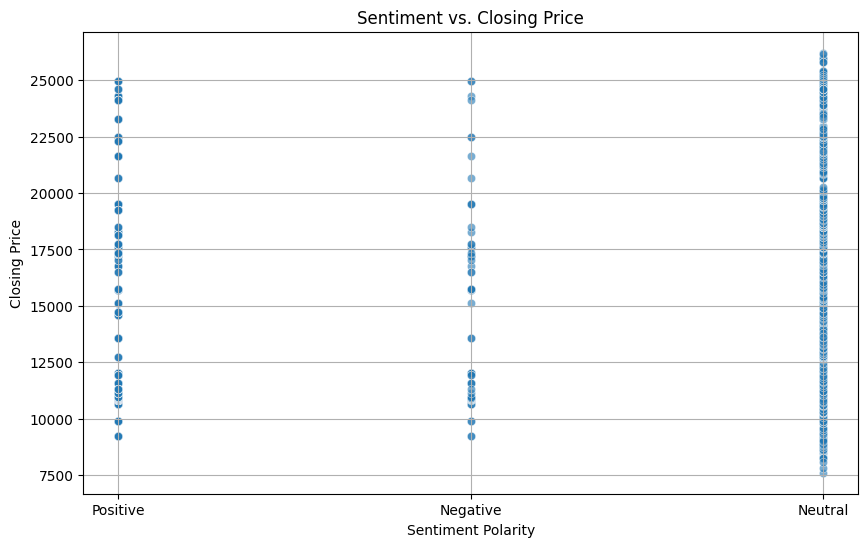

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='sentiment', y='close', alpha=0.6)
plt.title('Sentiment vs. Closing Price')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Closing Price')
plt.grid()
plt.show()

In [24]:
duplicates = merged_data.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}")
merged_data = merged_data.drop_duplicates()

Number of Duplicate Rows: 0


##Finding an outliers

In [25]:
Q1_close = merged_data['close'].quantile(0.25)
Q3_close = merged_data['close'].quantile(0.75)
IQR_close = Q3_close - Q1_close


##Removing the outliers

In [26]:
min_close_threshold = 10500

In [27]:
merged_data = merged_data[
    (merged_data['close'] >= max(Q1_close - 1.5 * IQR_close, min_close_threshold)) &
    (merged_data['close'] <= Q3_close + 1.5 * IQR_close)
]


##Visulaize it again

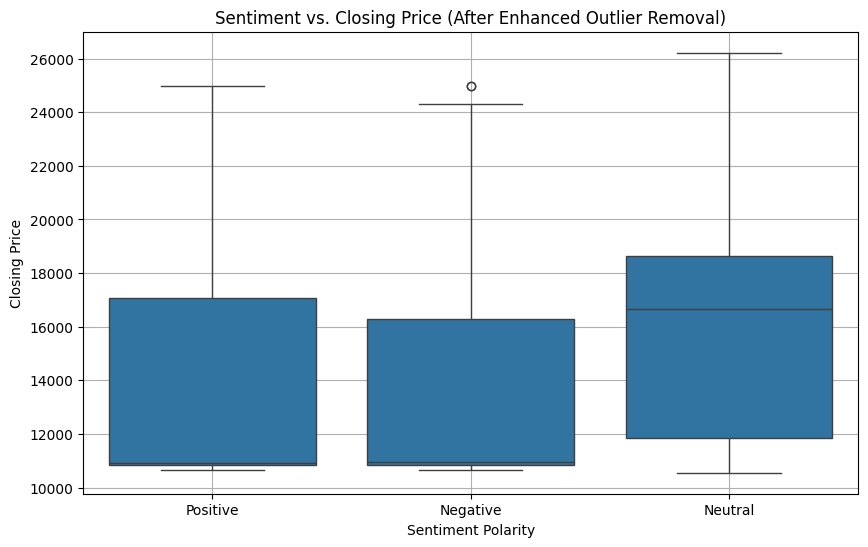

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='sentiment', y='close')
plt.title('Sentiment vs. Closing Price (After Enhanced Outlier Removal)')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Closing Price')
plt.grid()
plt.show()

In [29]:
print("Negative or zero values in 'close':", (merged_data['close'] <= 0).sum())


Negative or zero values in 'close': 0


In [30]:
missing_values = merged_data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
datetime                0
open                    0
high                    0
low                     0
close                   0
volume                  0
open interest           0
date_x                  0
title                1332
link                 1332
snippet              1332
date_range           1736
date_y               1332
usable_date          1332
sentiment               0
sentiment_encoded       0
dtype: int64


In [31]:
print("Data Types of Each Column:")
print(merged_data.dtypes)


Data Types of Each Column:
datetime             datetime64[ns]
open                        float64
high                        float64
low                         float64
close                       float64
volume                        int64
open interest                 int64
date_x                       object
title                        object
link                         object
snippet                      object
date_range                   object
date_y               datetime64[ns]
usable_date                  object
sentiment                    object
sentiment_encoded             int64
dtype: object


## Check for duplicates

In [32]:
duplicates = merged_data.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}")
merged_data = merged_data.drop_duplicates()

Number of Duplicate Rows: 0


##Filling the missing value

# Fill missing 'title', 'link', and 'snippet' using mode

In [33]:
merged_data['title'] = merged_data['title'].fillna(merged_data['title'].mode()[0])
merged_data['link'] = merged_data['link'].fillna(merged_data['link'].mode()[0])
merged_data['snippet'] = merged_data['snippet'].fillna('No snippet available')


## Fill date_y with usable date if missing

In [34]:
merged_data['date_y'] = merged_data['date_y'].fillna(merged_data['usable_date'])

### Fill usable date using backfill/forward fill

In [35]:
merged_data['usable_date'] = merged_data['usable_date'].fillna(method='bfill').fillna(method='ffill')

<ipython-input-35-c26dcad66d50>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['usable_date'] = merged_data['usable_date'].fillna(method='bfill').fillna(method='ffill')


### Final check for missing values

In [36]:
print("Missing Values After Filling:")
print(merged_data.isnull().sum())


Missing Values After Filling:
datetime                0
open                    0
high                    0
low                     0
close                   0
volume                  0
open interest           0
date_x                  0
title                   0
link                    0
snippet                 0
date_range           1736
date_y               1332
usable_date             0
sentiment               0
sentiment_encoded       0
dtype: int64


## Fill missing values in date range with a logical fallback

In [37]:
merged_data['date_range'] = merged_data['date_range'].fillna('No range available')

#### Replace missing date_y values with usable_date

In [38]:
merged_data['date_y'] = merged_data['date_y'].fillna(merged_data['usable_date'])

###Verify missing values

In [39]:
print("Missing Values After Fixing date_range and date_y:")
print(merged_data.isnull().sum())


Missing Values After Fixing date_range and date_y:
datetime             0
open                 0
high                 0
low                  0
close                0
volume               0
open interest        0
date_x               0
title                0
link                 0
snippet              0
date_range           0
date_y               0
usable_date          0
sentiment            0
sentiment_encoded    0
dtype: int64


#Feature engineering

In [40]:
lags = [1, 5, 7, 14, 30, 60, 90, 120, 150, 180]
horizons = {'day_1': 1, 'day_5': 5, 'day_7': 7, 'day_14': 14, '31st_dec': 21,
            'jan_2025': 51, 'feb_2025': 82, 'mar_2025': 112, 'apr_2025': 143, 'may_2025': 173}

##lagged feature

In [41]:
for lag in lags:
    merged_data[f'price_lag_{lag}'] = merged_data['close'].shift(lag)


## future target

In [42]:
for key, offset in horizons.items():
    merged_data[f'future_price_{key}'] = merged_data['close'].shift(-offset)


In [43]:
merged_data.dropna(inplace=True)

In [44]:
merged_data.head()

,datetime,open,high,low,close,volume,open interest,date_x,title,link,...,future_price_day_1,future_price_day_5,future_price_day_7,future_price_day_14,future_price_31st_dec,future_price_jan_2025,future_price_feb_2025,future_price_mar_2025,future_price_apr_2025,future_price_may_2025
180,2019-01-16,10899.65,10928.15,10876.90,10890.3,0,0,2019-01-16,"Police | City of Delray Beach, FL",https://www.delraybeachfl.gov/government/city-...,...,10905.2,10905.2,10905.2,10905.2,10906.95,10831.5,10849.8,10661.55,10651.8,10830.95
181,2019-01-17,10920.85,10930.65,10844.65,10905.2,0,0,2019-01-17,The richest 1% own 50% of stocks held by Ameri...,https://finance.yahoo.com/news/the-richest-1-o...,...,10905.2,10905.2,10905.2,10905.2,10906.95,10831.5,10849.8,10661.55,10651.8,10830.95
182,2019-01-17,10920.85,10930.65,10844.65,10905.2,0,0,2019-01-17,Deloitte's Corporate Finance practices recogni...,https://www2.deloitte.com/sg/en/pages/about-de...,...,10905.2,10905.2,10905.2,10905.2,10906.95,10831.5,10849.8,10661.55,10651.8,10830.95
183,2019-01-17,10920.85,10930.65,10844.65,10905.2,0,0,2019-01-17,"TACHYON HEARBEAT (YTESTQFTACHYON) Stock Price,...",https://finance.yahoo.com/quote/YTESTQFTACHYON/,...,10905.2,10905.2,10905.2,10905.2,10906.95,10831.5,10849.8,10661.55,10651.8,10830.95
184,2019-01-17,10920.85,10930.65,10844.65,10905.2,0,0,2019-01-17,Avantor Inc (AVTR) Stock Price & News - Google...,https://www.google.com/finance/quote/AVTR:NYSE...,...,10905.2,10905.2,10905.2,10905.2,10906.95,10831.5,10849.8,10661.55,10651.8,10830.95


In [45]:
news_data = news_data.drop(columns=['link'], errors='ignore')
merged_data = merged_data.drop(columns=['link'], errors='ignore')


In [46]:
merged_data.head()

,datetime,open,high,low,close,volume,open interest,date_x,title,snippet,...,future_price_day_1,future_price_day_5,future_price_day_7,future_price_day_14,future_price_31st_dec,future_price_jan_2025,future_price_feb_2025,future_price_mar_2025,future_price_apr_2025,future_price_may_2025
180,2019-01-16,10899.65,10928.15,10876.90,10890.3,0,0,2019-01-16,"Police | City of Delray Beach, FL",Finance · Fire Rescue · Human Resources · Info...,...,10905.2,10905.2,10905.2,10905.2,10906.95,10831.5,10849.8,10661.55,10651.8,10830.95
181,2019-01-17,10920.85,10930.65,10844.65,10905.2,0,0,2019-01-17,The richest 1% own 50% of stocks held by Ameri...,The chart breaks down the growing wealth gap v...,...,10905.2,10905.2,10905.2,10905.2,10906.95,10831.5,10849.8,10661.55,10651.8,10830.95
182,2019-01-17,10920.85,10930.65,10844.65,10905.2,0,0,2019-01-17,Deloitte's Corporate Finance practices recogni...,Deloitte's Corporate Finance practices recogni...,...,10905.2,10905.2,10905.2,10905.2,10906.95,10831.5,10849.8,10661.55,10651.8,10830.95
183,2019-01-17,10920.85,10930.65,10844.65,10905.2,0,0,2019-01-17,"TACHYON HEARBEAT (YTESTQFTACHYON) Stock Price,...",Find the latest TACHYON HEARBEAT (YTESTQFTACHY...,...,10905.2,10905.2,10905.2,10905.2,10906.95,10831.5,10849.8,10661.55,10651.8,10830.95
184,2019-01-17,10920.85,10930.65,10844.65,10905.2,0,0,2019-01-17,Avantor Inc (AVTR) Stock Price & News - Google...,Get the latest Avantor Inc (AVTR) real-time qu...,...,10905.2,10905.2,10905.2,10905.2,10906.95,10831.5,10849.8,10661.55,10651.8,10830.95


#Model Training for Multiple Targets

In [47]:
features = [col for col in merged_data.columns if 'price_lag' in col or 'sentiment_encoded' in col]
models = {}
results = {}

for target, offset in horizons.items():
    print(f"\nTraining model for {target}...")
    X = merged_data[features]
    y = merged_data[f'future_price_{target}']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    models[target] = model
    results[target] = {'MSE': mse, 'R2': r2}

    print(f"Target: {target}, MSE: {mse}, R2: {r2}")



Training model for day_1...
Target: day_1, MSE: 24226.26251775671, R2: 0.9982590662452949

Training model for day_5...
Target: day_5, MSE: 28772.552504502422, R2: 0.997928782684436

Training model for day_7...
Target: day_7, MSE: 34773.579097659116, R2: 0.9975107144525561

Training model for day_14...
Target: day_14, MSE: 26681.588998309693, R2: 0.9981097548058357

Training model for 31st_dec...
Target: 31st_dec, MSE: 40376.24630055961, R2: 0.9971663855198235

Training model for jan_2025...
Target: jan_2025, MSE: 41209.33641662101, R2: 0.9973054995779548

Training model for feb_2025...
Target: feb_2025, MSE: 67357.3926443971, R2: 0.9957749164754485

Training model for mar_2025...
Target: mar_2025, MSE: 57546.346915073096, R2: 0.9966907054628217

Training model for apr_2025...
Target: apr_2025, MSE: 76219.5497548318, R2: 0.9958175817998075

Training model for may_2025...
Target: may_2025, MSE: 92675.1086040356, R2: 0.9951466529059274


In [48]:
def predict_specific_dates(current_data):
    """Predict future prices for specific dates using trained models."""
    if 'snippet' in current_data.columns:

        current_data['sentiment_encoded'] = label_encoder.transform(
            current_data['snippet'].apply(lambda x: classify_sentiment(x))
        )
    else:

        print("Warning: 'snippet' column is missing in the prediction data. Defaulting sentiment to 'Neutral'.")
        current_data['sentiment_encoded'] = label_encoder.transform(['Neutral'] * len(current_data))


    for lag in lags:
        current_data[f'price_lag_{lag}'] = current_data['close'].shift(lag)

    predictions = {}
    for target, model in models.items():
        predictions[target] = model.predict(current_data[features].tail(1))[0]

    return predictions



In [49]:
latest_data = nifty_data.tail(1).copy()
future_predictions = predict_specific_dates(latest_data)



In [50]:
print("Future Price Predictions:")
for date, price in future_predictions.items():
    print(f"{date}: {price:.2f}")

Future Price Predictions:
day_1: 17310.12
day_5: 17491.10
day_7: 17492.36
day_14: 17368.57
31st_dec: 17413.60
jan_2025: 17254.06
feb_2025: 17399.62
mar_2025: 17472.10
apr_2025: 17463.87
may_2025: 18168.52


In [55]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(model, f)